# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf


from datetime import datetime

## Load Data

In [2]:
parse_dates = ['Date']
df = pd.read_csv(r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\df.csv', parse_dates = parse_dates)
CZR = pd.read_csv(r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\CZR.csv', parse_dates = parse_dates)
MGM = pd.read_csv(r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\MGM.csv', parse_dates = parse_dates)
LVS = pd.read_csv(r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\LVS.csv', parse_dates = parse_dates)
WYNN = pd.read_csv(r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\WYNN.csv', parse_dates = parse_dates)

In [3]:
# Lost datetime as index when saving CSV, reformatting to datetime index
df = df.set_index('Date')
CZR = CZR.set_index('Date')
MGM = MGM.set_index('Date')
LVS = LVS.set_index('Date')
WYNN = WYNN.set_index('Date')

## Explore Data

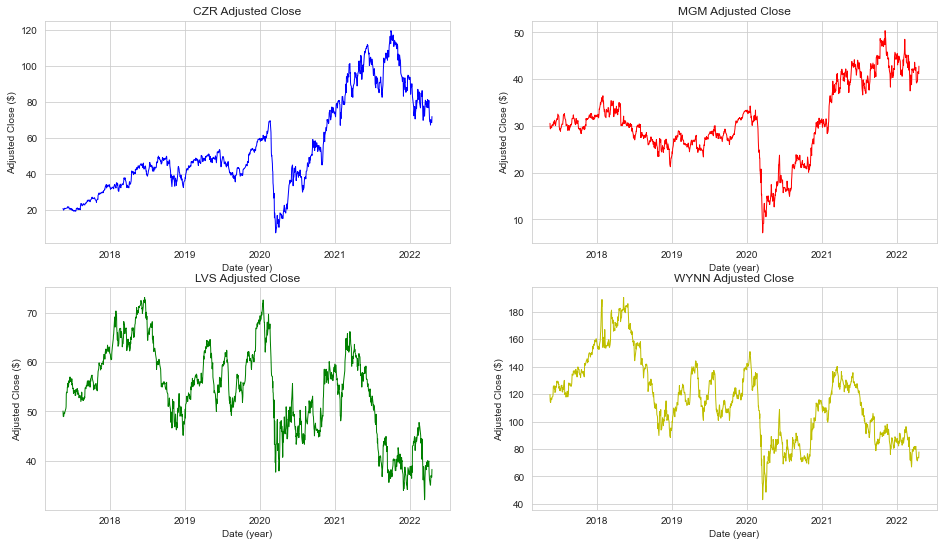

In [4]:
# Visualize adjusted close for each stock 

def plot_timeseries(axes, x, y, color, xlabel, ylabel, title):
    axes.plot(x,y, color=color, linewidth=1)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.tick_params('y')


plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots(2,2)
plot_timeseries(ax[0,0], CZR.index, CZR['Adj Close'], 'b', 'Date (year)', 'Adjusted Close ($)', 'CZR Adjusted Close')
plot_timeseries(ax[0,1], MGM.index, MGM['Adj Close'], 'r', 'Date (year)', 'Adjusted Close ($)', 'MGM Adjusted Close')
plot_timeseries(ax[1,0], LVS.index, LVS['Adj Close'], 'g', 'Date (year)', 'Adjusted Close ($)', 'LVS Adjusted Close')
plot_timeseries(ax[1,1], WYNN.index, WYNN['Adj Close'], 'y', 'Date (year)', 'Adjusted Close ($)', 'WYNN Adjusted Close')


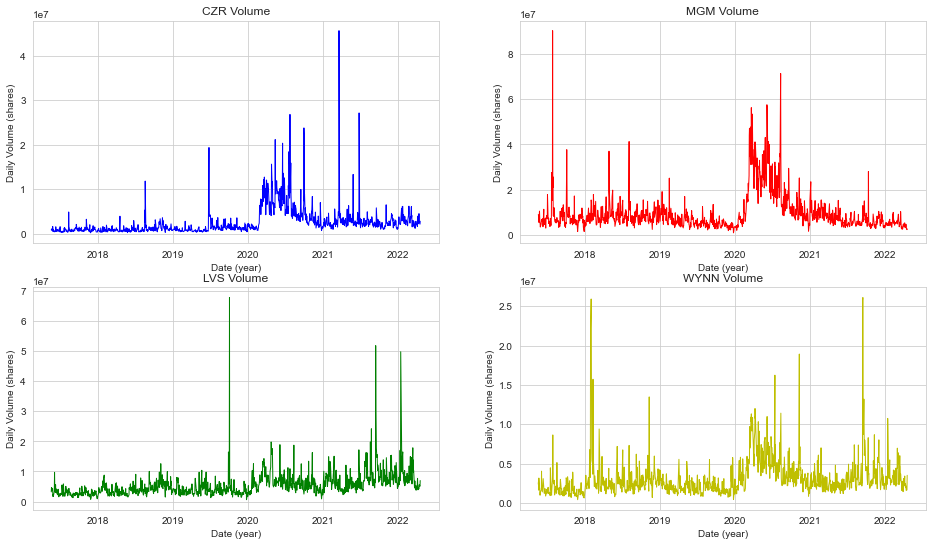

In [5]:
# Visualize volume for each stock

def plot_timeseries(axes, x, y, color, xlabel, ylabel, title):
    axes.plot(x,y, color=color, linewidth=1)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.tick_params('y')


plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots(2,2)
plot_timeseries(ax[0,0], CZR.index, CZR['Volume'], 'b', 'Date (year)', 'Daily Volume (shares)', 'CZR Volume')
plot_timeseries(ax[0,1], MGM.index, MGM['Volume'], 'r', 'Date (year)', 'Daily Volume (shares)', 'MGM Volume')
plot_timeseries(ax[1,0], LVS.index, LVS['Volume'], 'g', 'Date (year)', 'Daily Volume (shares)', 'LVS Volume')
plot_timeseries(ax[1,1], WYNN.index, WYNN['Volume'], 'y', 'Date (year)', 'Daily Volume (shares)', 'WYNN Volume')

In [6]:
# calculate daily return for each stock

stock_list = [CZR, MGM, LVS, WYNN]

for stock in stock_list:
    stock['Daily Return'] = stock['Adj Close'].pct_change()

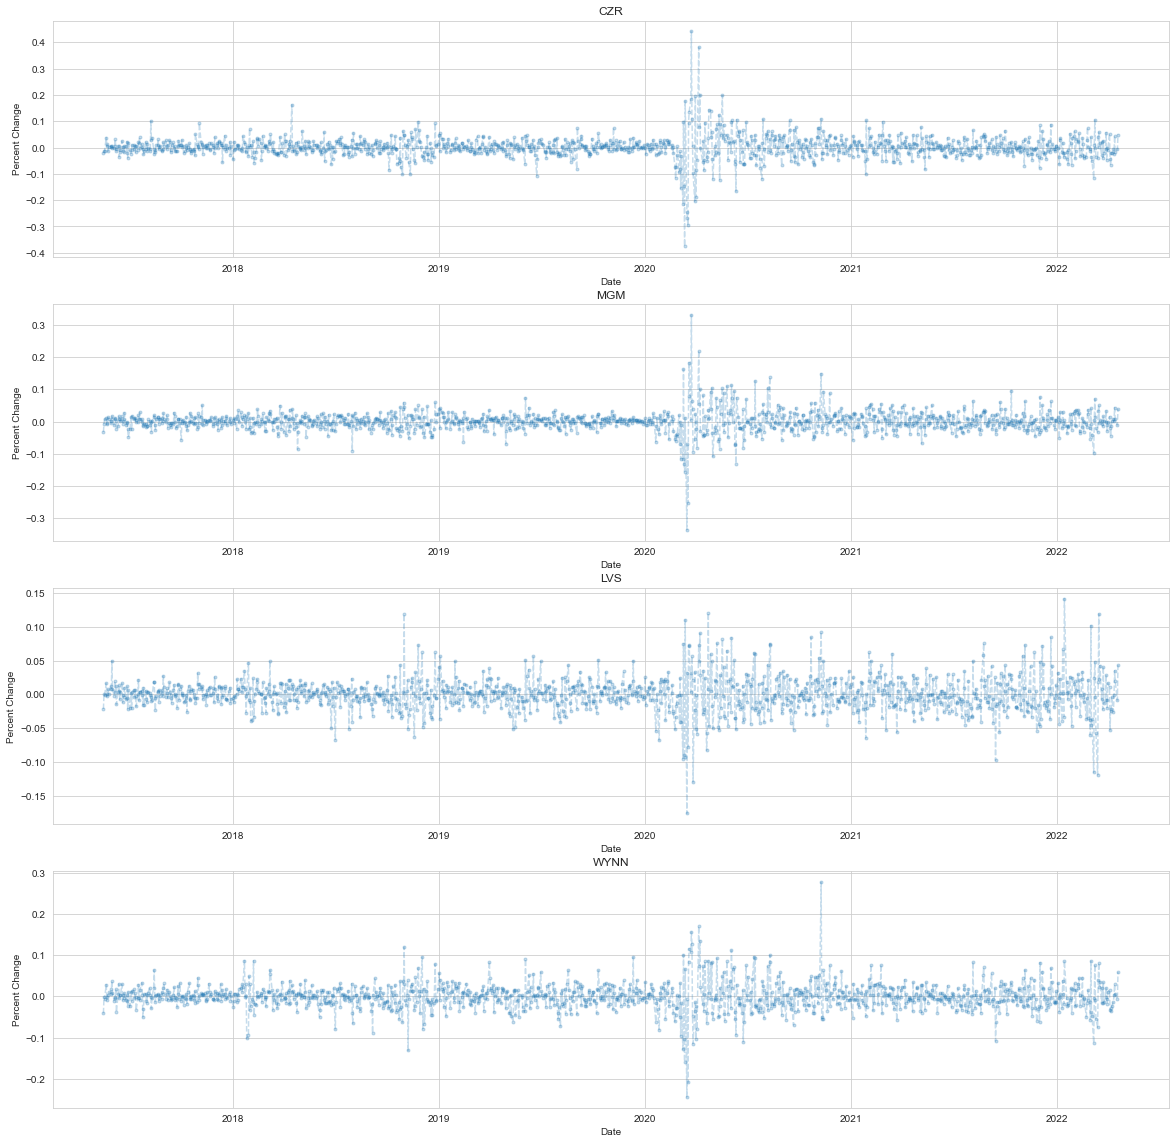

In [7]:
# visualize daily return for each stock
def plot_dr(axes, data, title):
    axes.plot(data.index, data['Daily Return'], linestyle= '--', marker= '.', alpha=.25)
    axes.set_xlabel('Date')
    axes.set_ylabel('Percent Change')
    axes.set_title(title)
    
    
plt.rcParams["figure.figsize"] = [20,20]
fig, ax = plt.subplots(4,1)
plot_dr(ax[0], CZR, 'CZR')
plot_dr(ax[1], MGM, 'MGM')
plot_dr(ax[2], LVS, 'LVS')
plot_dr(ax[3], WYNN, 'WYNN')

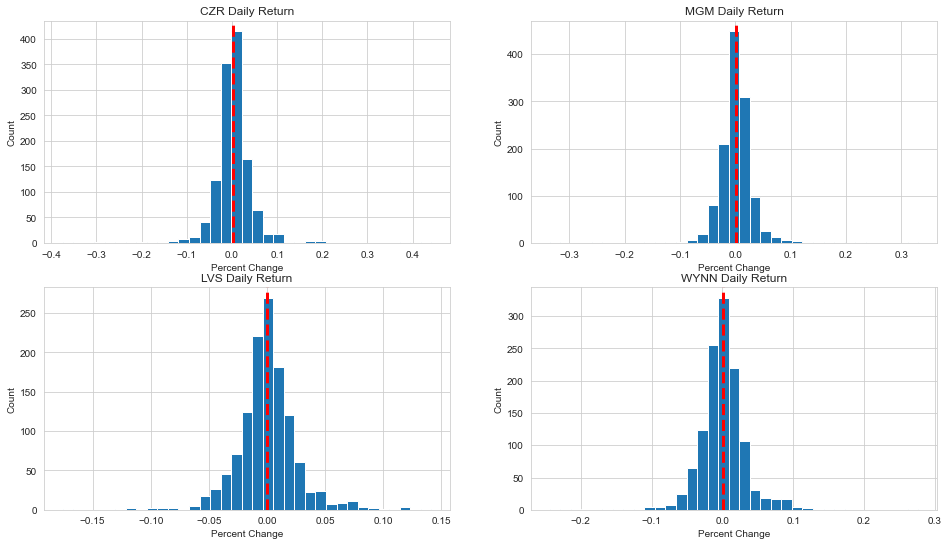

In [8]:
# get a feel for avg daily returns
bins = int(np.sqrt(len(CZR)))

def plot_hist(axes, data, title):
    axes.hist(data['Daily Return'], bins=bins)
    axes.axvline(data['Daily Return'].mean(), color='r', linestyle='dashed', linewidth=3)
    axes.set_xlabel('Percent Change')
    axes.set_ylabel('Count')
    axes.set_title(title)
    
    
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots(2,2)
plot_hist(ax[0,0], CZR, 'CZR Daily Return')
plot_hist(ax[0,1], MGM, 'MGM Daily Return')
plot_hist(ax[1,0], LVS, 'LVS Daily Return')
plot_hist(ax[1,1], WYNN, 'WYNN Daily Return')

In [9]:
# create df with just closing values
closing_df = df[['Adj Close', 'Ticker']]
closing_df.Ticker.unique()

array(['CZR', 'MGM', 'LVS', 'WYNN'], dtype=object)

In [10]:
# pivot df to have proper columns
closing_df = closing_df.pivot(columns="Ticker", values="Adj Close")
closing_df.head()

Ticker,CZR,LVS,MGM,WYNN
Date,,,,
2017-05-16,20.650000,50.081226,30.551605,119.609947
2017-05-17,20.225000,48.995129,29.555357,114.663231
2017-05-18,19.950001,49.003742,29.375078,114.476189
2017-05-19,19.700001,48.934792,29.650236,113.830963
2017-05-22,20.450001,49.736431,29.953857,117.038376


In [11]:
# calculating daily return for each day of each stock
stock_dr = closing_df.pct_change()
stock_dr.head()

Ticker,CZR,LVS,MGM,WYNN
Date,,,,
2017-05-16,NaN,NaN,NaN,NaN
2017-05-17,-0.020581,-0.021687,-0.032609,-0.041357
2017-05-18,-0.013597,0.000176,-0.006100,-0.001631
2017-05-19,-0.012531,-0.001407,0.009367,-0.005636
2017-05-22,0.038071,0.016382,0.010240,0.028177


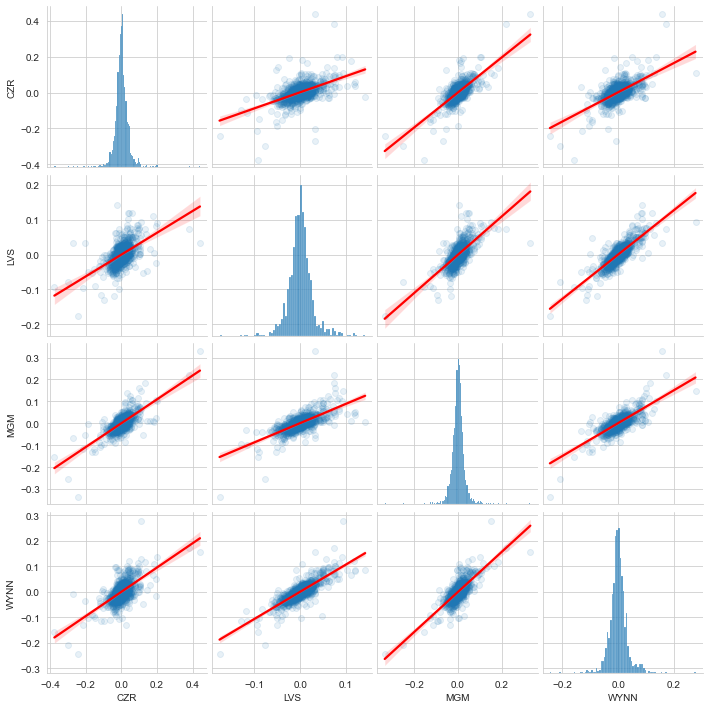

In [12]:
# visually checking correlation between each stocks daily return
sns.pairplot(stock_dr, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

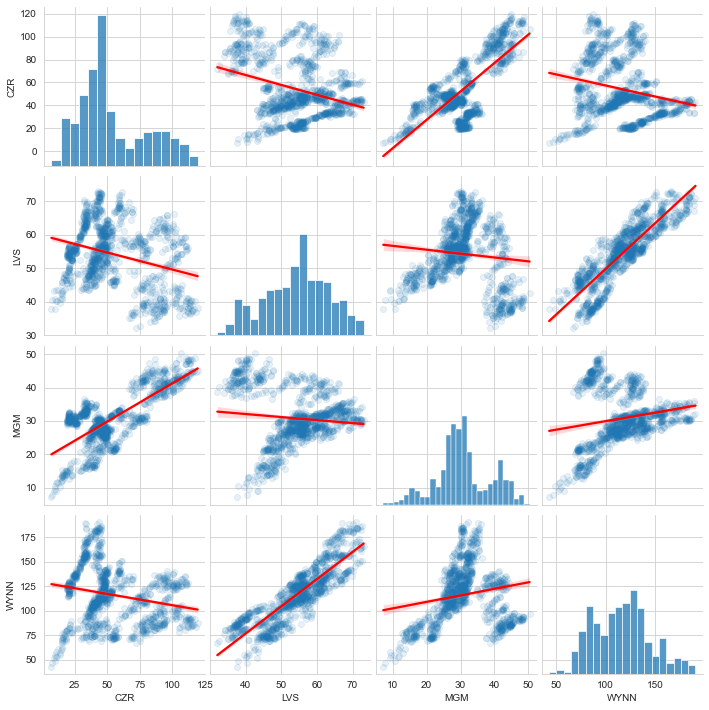

In [13]:
# visually checking correlation between each stocks adj closing price
sns.pairplot(closing_df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [14]:
# Calculate moving averages for each stock on three intervals, 20, 50, and 100 days.

mov_avg = [20, 50, 100]

for a in mov_avg:
    for stock in stock_list:
        new_col = f'MA {a}'
        stock[new_col] = stock['Adj Close'].rolling(a).mean()

In [15]:
# Calculate exponential moving averages

ema_list = [20, 50, 100]

for a in ema_list:
    for stock in stock_list:
        stock.ta.ema(close='Adj Close', length=a, append=True)

<AxesSubplot:>

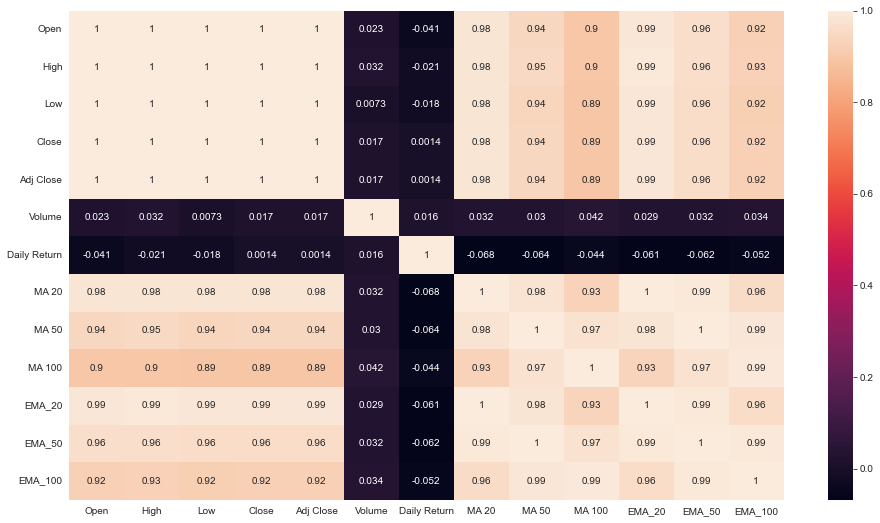

In [16]:
sns.heatmap(CZR.corr(), annot= True)

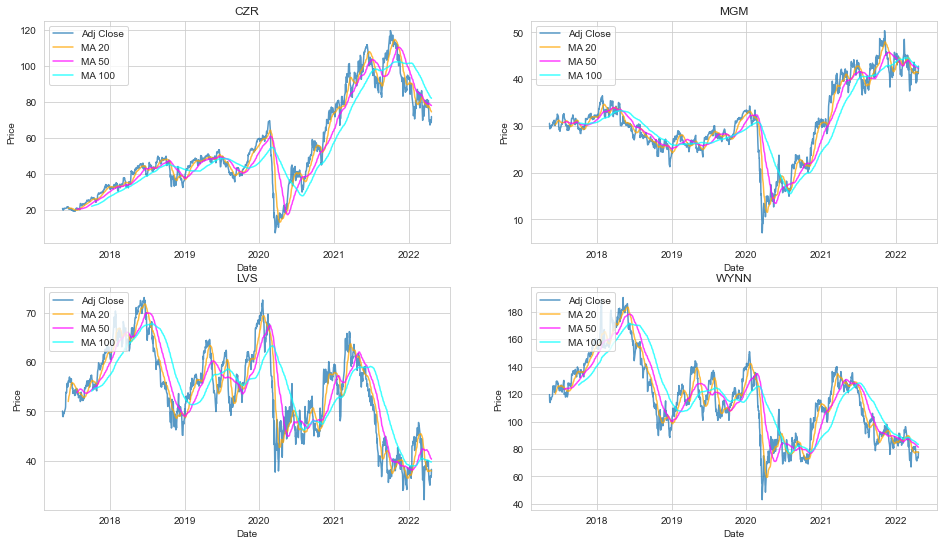

In [17]:
# visualize moving averages for each stock

def plot_ma(axes, data, title):
    axes.plot(data.index, data['Adj Close'], label='Adj Close', alpha=.75)
    axes.plot(data.index, data['MA 20'], label='MA 20', color='orange', alpha=.75)
    axes.plot(data.index, data['MA 50'], label='MA 50', color='magenta', alpha=.75)
    axes.plot(data.index, data['MA 100'], label='MA 100', color='cyan', alpha=.75)
    axes.set_xlabel('Date')
    axes.set_ylabel('Price')
    axes.set_title(title)
    axes.legend(loc='upper left')
    
    
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots(2,2)
plot_ma(ax[0,0], CZR, 'CZR')
plot_ma(ax[0,1], MGM, 'MGM')
plot_ma(ax[1,0], LVS, 'LVS')
plot_ma(ax[1,1], WYNN, 'WYNN')

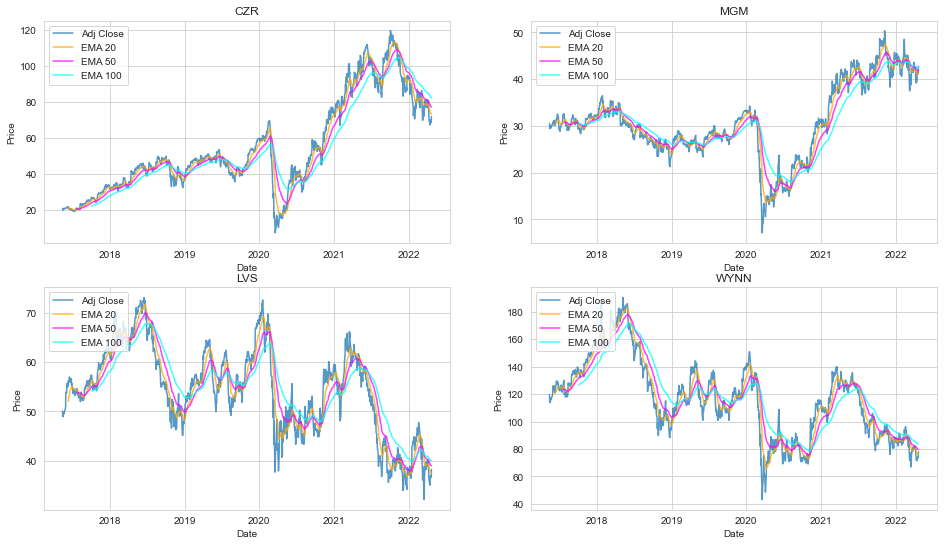

In [18]:
# visualize exponential moving averages for each stock

def plot_ma(axes, data, title):
    axes.plot(data.index, data['Adj Close'], label='Adj Close', alpha=.75)
    axes.plot(data.index, data['EMA_20'], label='EMA 20', color='orange', alpha=.75)
    axes.plot(data.index, data['EMA_50'], label='EMA 50', color='magenta', alpha=.75)
    axes.plot(data.index, data['EMA_100'], label='EMA 100', color='cyan', alpha=.75)
    axes.set_xlabel('Date')
    axes.set_ylabel('Price')
    axes.set_title(title)
    axes.legend(loc='upper left')
    
    
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots(2,2)
plot_ma(ax[0,0], CZR, 'CZR')
plot_ma(ax[0,1], MGM, 'MGM')
plot_ma(ax[1,0], LVS, 'LVS')
plot_ma(ax[1,1], WYNN, 'WYNN')

Moving forward after conducting EDA we will be conducting two separate models. A linear regression model using EMA as the independent variable and adjusted close price as the dependent variable. The second model will be the LSTM which will initially use just the adjusted close variable. Both of these dataframes will be created next and ready for the next step. In the linear regression model using exponential moving average, if the model predicts a higher closing price than the price the stock opens for that day, strategy would be to buy the stock at open and sell just before the market closes. The LSTM model will be much more comprehensive.

In [19]:
# this dataframe will be used for linear regression model

df1 = CZR[['Adj Close', 'EMA_20']]
df1 = df1[df1['EMA_20'].notna()]
df1
df1_datapath = r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\df1.csv'
df1.to_csv(df1_datapath)

In [21]:
df2 = CZR[['Adj Close']]
df2
df2_datapath = r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\df2.csv'
df2.to_csv(df2_datapath)